## Task One
Can we categorize we the films by type, such as animated or not by using the crew's job titles?

### This notebook shows unique job titles associated with animation movies. 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style="seaborn")
%matplotlib inline

In [38]:
df_movie = pd.read_csv("../input/tmdb-movie-metadata/tmdb_5000_movies.csv")
df_credit = pd.read_csv("../input/tmdb-movie-metadata/tmdb_5000_credits.csv")

In [39]:
def extract_feature(x, field='name'):
    """
    function is intended to convert string
    json and extract values of a specified field
    as a list...
    """
    x = ast.literal_eval(x)
    return [i[field].lower() for i in x]

def find_animation(x):
    '''
    Search for animation genre and label it as '1' for
    animation and '0' for non - animation
    '''
    for i in x:
        if i.lower() == 'animation':
            return 1
    return 0

# Preprocessing

In [40]:
df_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [100]:
#  checking length of both dataframes
len(df_movie),len(df_credit)

(4803, 4803)

In [42]:
# Extracting genres
df_movie['list_genres'] = df_movie['genres'].apply(extract_feature)
df_movie['list_genres']

0       [action, adventure, fantasy, science fiction]
1                        [adventure, fantasy, action]
2                          [action, adventure, crime]
3                    [action, crime, drama, thriller]
4                [action, adventure, science fiction]
                            ...                      
4798                        [action, crime, thriller]
4799                                [comedy, romance]
4800               [comedy, drama, romance, tv movie]
4801                                               []
4802                                    [documentary]
Name: list_genres, Length: 4803, dtype: object

In [43]:
# Extracting animated movies
df_movie['animated'] = df_movie['list_genres'].apply(find_animation)

In [44]:
df_movie.head(4).T

,0,1,2,3
budget,237000000,300000000,245000000,250000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/
id,19995,285,206647,49026
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
original_language,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...
popularity,150.438,139.083,107.377,112.313
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""..."


In [45]:
# Selecting revelant columns
df_movie = df_movie[['id', 'original_title','list_genres','animated']]
df_movie.head()

,id,original_title,list_genres,animated
0,19995,Avatar,"[action, adventure, fantasy, science fiction]",0
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]",0
2,206647,Spectre,"[action, adventure, crime]",0
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]",0
4,49529,John Carter,"[action, adventure, science fiction]",0


In [46]:
df_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [47]:
# Extracting all job roles for each movie
df_credit['alljobs'] = df_credit['crew'].apply(extract_feature,field = 'job')
df_credit.head()

,movie_id,title,cast,crew,alljobs
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[editor, production design, sound designer, su..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[director of photography, director, producer, ..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[original music composer, director, set decora..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[original music composer, producer, screenplay..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[screenplay, director, thanks, producer, casti..."


In [48]:
# Merge movie and credit dataframes
df = pd.merge(df_movie, df_credit,left_on='id', right_on='movie_id')
df.head()

,id,original_title,list_genres,animated,movie_id,title,cast,crew,alljobs
0,19995,Avatar,"[action, adventure, fantasy, science fiction]",0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[editor, production design, sound designer, su..."
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]",0,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[director of photography, director, producer, ..."
2,206647,Spectre,"[action, adventure, crime]",0,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[original music composer, director, set decora..."
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]",0,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[original music composer, producer, screenplay..."
4,49529,John Carter,"[action, adventure, science fiction]",0,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[screenplay, director, thanks, producer, casti..."


In [49]:
# selecting useful features
df = df[['title','list_genres','animated','alljobs']]
df.head()

,title,list_genres,animated,alljobs
0,Avatar,"[action, adventure, fantasy, science fiction]",0,"[editor, production design, sound designer, su..."
1,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]",0,"[director of photography, director, producer, ..."
2,Spectre,"[action, adventure, crime]",0,"[original music composer, director, set decora..."
3,The Dark Knight Rises,"[action, crime, drama, thriller]",0,"[original music composer, producer, screenplay..."
4,John Carter,"[action, adventure, science fiction]",0,"[screenplay, director, thanks, producer, casti..."


Below we can see the are 234 animated movies and 4569 non animated movies

In [50]:
df['animated'].value_counts()

0    4569
1     234
Name: animated, dtype: int64

In [51]:
# save df
# df.to_csv('taskone.csv',index=False)

In [52]:
# Total number of unique jobs across all movies
jobs = []
for i in df['alljobs']:
    for j in i:
        jobs.append(j.lower())
print(len(set(jobs)))
jobs = list(set(jobs))
jobs = [[x] for x in jobs]
# print(jobs)

417


In [53]:
# Seperate animated movies and non-animated movies into different dataframes
animated= df.groupby('animated').get_group(1).reset_index(drop=True)
others = df.groupby('animated').get_group(0).reset_index(drop=True)

In [54]:
# total list of crews job titles in animated movies
animated_jobs = []
for i in animated['alljobs']:
    for j in i:
        animated_jobs.append(j.lower())
print(len(set(animated_jobs)))
ajobs = list(set(animated_jobs))

278


In [55]:
# total list of crews job titles in non-animated movies
other_jobs = []
for i in others['alljobs']:
    for j in i:
        other_jobs.append(j.lower())
print(len(set(other_jobs)))
ojobs = list(set(other_jobs))

401


In [56]:
# Job titles that only animation movies have, there are 16
unique_animation_jobs =  [i for i in ajobs if i not in ojobs]
print(unique_animation_jobs)
len(unique_animation_jobs)

['animation department coordinator', 'directing lighting artist', 'set dressing manager', 'master lighting artist', 'information systems manager', 'photoscience manager', 'animation fix coordinator', 'lighting coordinator', 'fix animator', 'second film editor', 'lighting production assistant', 'lighting manager', 'prop designer', 'additional editorial assistant', 'key animation', 'co-editor']


16

1. animation department coordinator
2. directing lighting artist 
3. set dressing manager
4. master lighting artist 
5. information systems manager,
6. photoscience manager
7. animation fix coordinator
8. lighting coordinator 
9. fix animator
10. second film editor 
11. lighting production assistant
12. lighting manager
13. prop designer
14. additional editorial assistant
15. key animation
16. co-editor

In [57]:
animated.head()

,title,list_genres,animated,alljobs
0,Tangled,"[animation, family]",1,"[executive producer, novel, novel, animation s..."
1,Monsters University,"[animation, family]",1,"[executive producer, executive producer, execu..."
2,Cars 2,"[animation, family, adventure, comedy]",1,"[director, original story, production design, ..."
3,Toy Story 3,"[animation, family, comedy]",1,"[story, director, story, producer, story, than..."
4,The Good Dinosaur,"[adventure, animation, family]",1,"[story, producer, original music composer, ori..."


In [58]:
animated_copy = animated.copy()
animated_copy['alljobs'].head(1)[0]

['executive producer',
 'novel',
 'novel',
 'animation supervisor',
 'production design',
 'original music composer',
 'songs',
 'screenplay',
 'producer',
 'story',
 'co-art director',
 'editor',
 'original music composer',
 'director',
 'sound re-recording mixer',
 'sound re-recording mixer',
 'director',
 'casting',
 'executive producer',
 'animation supervisor',
 'characters',
 'post production supervisor',
 'executive music producer',
 'songs',
 'supervising animator',
 'visual effects supervisor',
 'animation supervisor',
 'music supervisor',
 'sound editor',
 'visual development',
 'production supervisor',
 'sound editor',
 'sound designer',
 'associate producer',
 'visual development',
 'layout',
 'layout',
 'characters',
 'layout',
 'visual development',
 'layout',
 'characters',
 'layout',
 'visual development',
 'executive in charge of post production',
 'production supervisor',
 'lighting supervisor',
 'art direction',
 'visual development',
 'production manager',
 'layout'

In [59]:
# Check for each of these unique animation job titles for each movie
job_count = []
animation_jobs = []
for k in animated_copy['alljobs']:
    k = list(set(k))
    ujobs= [j for j in unique_animation_jobs if j not in k]
    job_count.append(len(ujobs))
    animation_jobs.append(ujobs)
    
animated_copy['animation_jobs'] = animation_jobs
animated_copy.head()

,title,list_genres,animated,alljobs,animation_jobs
0,Tangled,"[animation, family]",1,"[executive producer, novel, novel, animation s...","[animation department coordinator, directing l..."
1,Monsters University,"[animation, family]",1,"[executive producer, executive producer, execu...","[animation department coordinator, directing l..."
2,Cars 2,"[animation, family, adventure, comedy]",1,"[director, original story, production design, ...","[animation department coordinator, directing l..."
3,Toy Story 3,"[animation, family, comedy]",1,"[story, director, story, producer, story, than...","[animation department coordinator, directing l..."
4,The Good Dinosaur,"[adventure, animation, family]",1,"[story, producer, original music composer, ori...","[animation department coordinator, directing l..."


In [64]:
animated_copy['animation_job_count']= job_count
animated_copy.head(10)

,title,list_genres,animated,alljobs,animation_jobs,animation_job_count
0,Tangled,"[animation, family]",1,"[executive producer, novel, novel, animation s...","[animation department coordinator, directing l...",16
1,Monsters University,"[animation, family]",1,"[executive producer, executive producer, execu...","[animation department coordinator, directing l...",16
2,Cars 2,"[animation, family, adventure, comedy]",1,"[director, original story, production design, ...","[animation department coordinator, directing l...",15
3,Toy Story 3,"[animation, family, comedy]",1,"[story, director, story, producer, story, than...","[animation department coordinator, directing l...",16
4,The Good Dinosaur,"[adventure, animation, family]",1,"[story, producer, original music composer, ori...","[animation department coordinator, directing l...",16
5,Brave,"[animation, adventure, comedy, family, action,...",1,"[music editor, sound re-recording mixer, sound...","[animation department coordinator, directing l...",15
6,WALL·E,"[animation, family]",1,"[screenplay, director, original story, executi...","[animation department coordinator, directing l...",15
7,A Christmas Carol,"[animation, drama]",1,"[screenplay, director, novel, makeup artist, a...","[animation department coordinator, directing l...",16
8,Up,"[animation, comedy, family, adventure]",1,"[executive producer, screenplay, co-director, ...","[animation department coordinator, directing l...",15
9,Monsters vs Aliens,"[animation, family, adventure, science fiction]",1,"[director, screenplay, screenplay, screenplay,...","[animation department coordinator, directing l...",16


Recall there are 234 animated movies and 16 job titles unique to animated movies.
Out of the 234 movies, 
1. 211 movies made use of the 16 jobs,
2. 19 movies made use of the 15 jobs 
3. 1 movie each made use of 13,12,11,4 jobs respectively

In [61]:
ajobcount = animated_copy['animation_job_count'].value_counts()
type(ajobcount)
ajobcount

16    211
15     19
13      1
12      1
11      1
4       1
Name: animation_job_count, dtype: int64

Text(0, 0.5, 'number of animated movies')

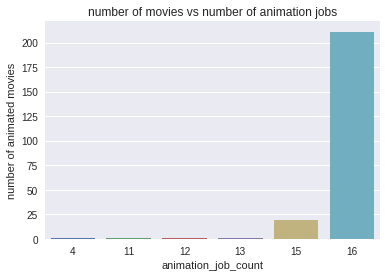

In [99]:
ax = sns.countplot(x = 'animation_job_count',
            data = animated_copy)
ax.set_title('number of movies vs number of animation jobs')
ax.set_ylabel('number of animated movies')

From the figure above, its obvious that most animated movies needs at least 4 out of the 16 jobs unique to animated movies. Hence, it is possible to know if a movie is animated by checking if they have at least 4 of any of the 16 jobs unique to animated movies.